In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
nx = 41
ny = 41
xmin, xmax = 0.0, 1.0
ymin, ymax = -0.5, 0.5
Lx = (xmax - xmin)
Ly = (ymax - ymin)
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

x = numpy.linspace(xmin, xmax, num = nx)
y = numpy.linspace(ymin, ymax, num = ny)

In [9]:
def poisson_source(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    b = (-2.0 * numpy.pi / Lx * numpy.pi / Ly * 
        numpy.sin(numpy.pi * X / Lx) * 
        numpy.cos(numpy.pi * Y / Lx))
    return b

In [5]:
from helper import l2_norm

In [6]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter = 20000, rtol = 1e-6):
    p = p0.copy()
    conv = []
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [7]:
from helper import plot_3d

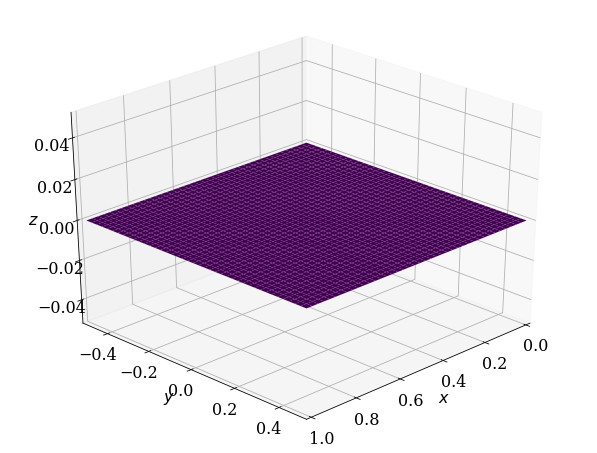

In [10]:
p0 = numpy.zeros((ny, nx))

b = poisson_source(x, y, Lx, Ly)

plot_3d(x, y, p0)

In [12]:
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol = 2e-7)
print('Jacobi relaxation: {} iterations'.format(ites) + 
      'to reach a relative difference of {}'.format(conv[-1]))

Jacobi relaxation: 3125 iterationsto reach a relative difference of 1.9958631078740742e-07


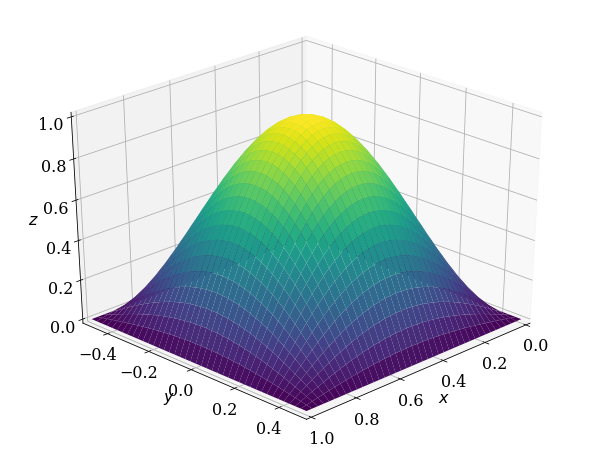

In [13]:
plot_3d(x, y, p)

In [15]:
def poisson_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    p = numpy.sin(numpy.pi * X / Lx) * numpy.cos(numpy.pi * Y / Ly)
    return p

In [16]:
p_exact = poisson_solution(x, y, Lx, Ly)

In [17]:
l2_norm(p, p_exact)

0.00044962635351970283

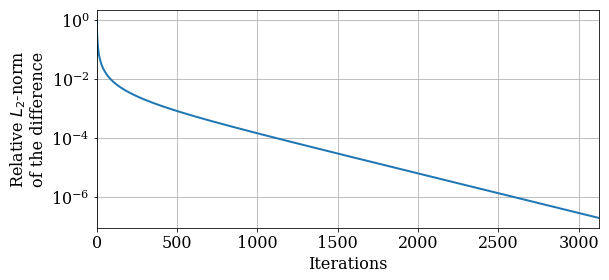

In [20]:
pyplot.figure(figsize = (9.0, 4.0))
pyplot.xlabel('Iterations')
pyplot.ylabel('Relative $L_2$-norm\nof the difference')
pyplot.grid()
pyplot.semilogy(conv, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0, len(conv));

In [21]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    ny = nx
    dx = Lx / (nx - 1)
    dy = Ly / (ny - 1)
    x = numpy.linspace(xmin, xmax, num = nx)
    y = numpy.linspace(ymin, ymax, num = ny)
    p0 = numpy.zeros((ny, nx))
    b = poisson_source(x, y, Lx, Ly)
    p, ites, _ = poisson_2d_jacobi(p0, b, dx, dy, rtol = 2e-7)
    print('[nx = {}] Number of Jacobi iterations: {}'.format(nx, ites))
    p_exact = poisson_solution(x, y, Lx, Ly)
    errors.append(l2_norm(p, p_exact))

[nx = 11] Number of Jacobi iterations: 249
[nx = 21] Number of Jacobi iterations: 892
[nx = 41] Number of Jacobi iterations: 3125
[nx = 81] Number of Jacobi iterations: 10708


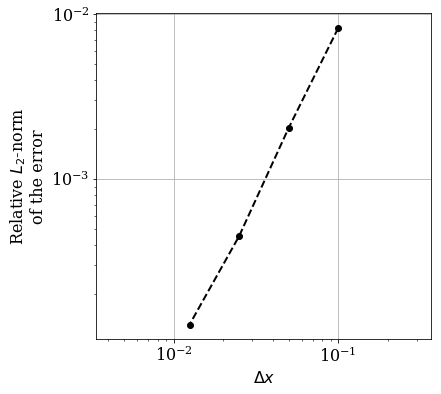

In [23]:
pyplot.figure(figsize = (6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors, 
              color = 'black', linestyle='--', linewidth = 2, marker = 'o')
pyplot.axis('equal');